# RQ4:
Is there any correlation between properties of embedded in vector
space document segments distribution and quality of QA?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pickle
with open('for_hypo.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
t = df[(df.c==60) & (df.k1 == 1.2) 
        & (df.dataset=='bench')
        & (df.embedder == 'BAAI')
        ]
t = t.groupby(['file', 'vector_variance', 'silhouette_score_euclidian', 'silhouette_score_cosine', 'EID', 'redundancy', 'dim', 'chunk_len'])[['correctness', 'mean_relevance']].mean().reset_index()

In [5]:
t.chunk_len = t.chunk_len.apply(lambda x: sorted(list(set(t.chunk_len))).index(x))

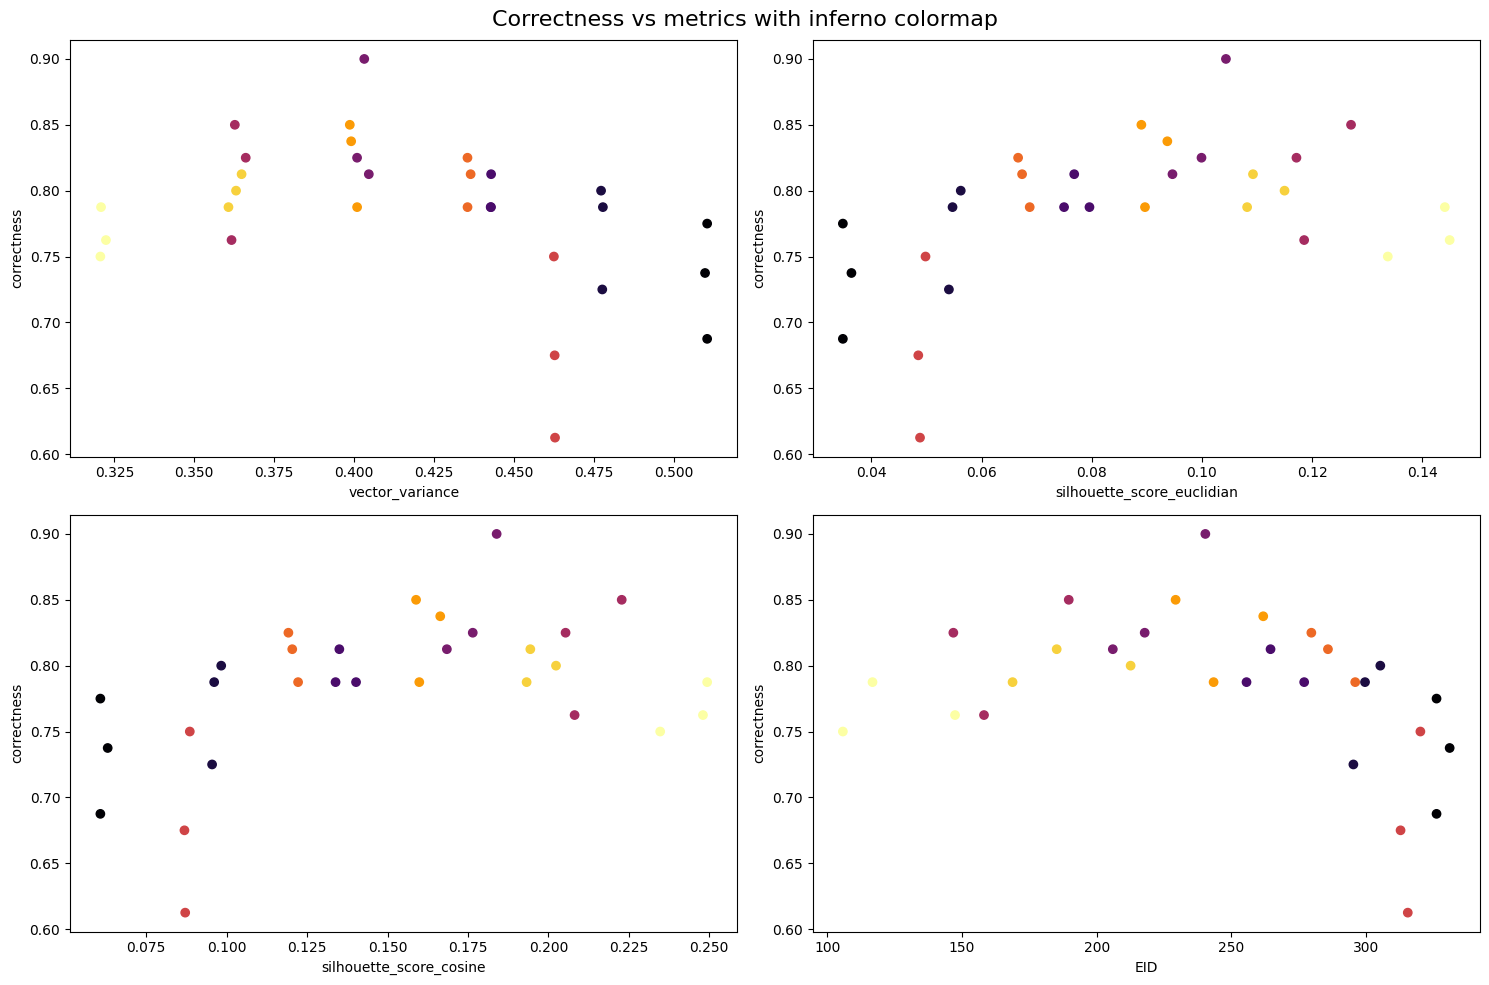

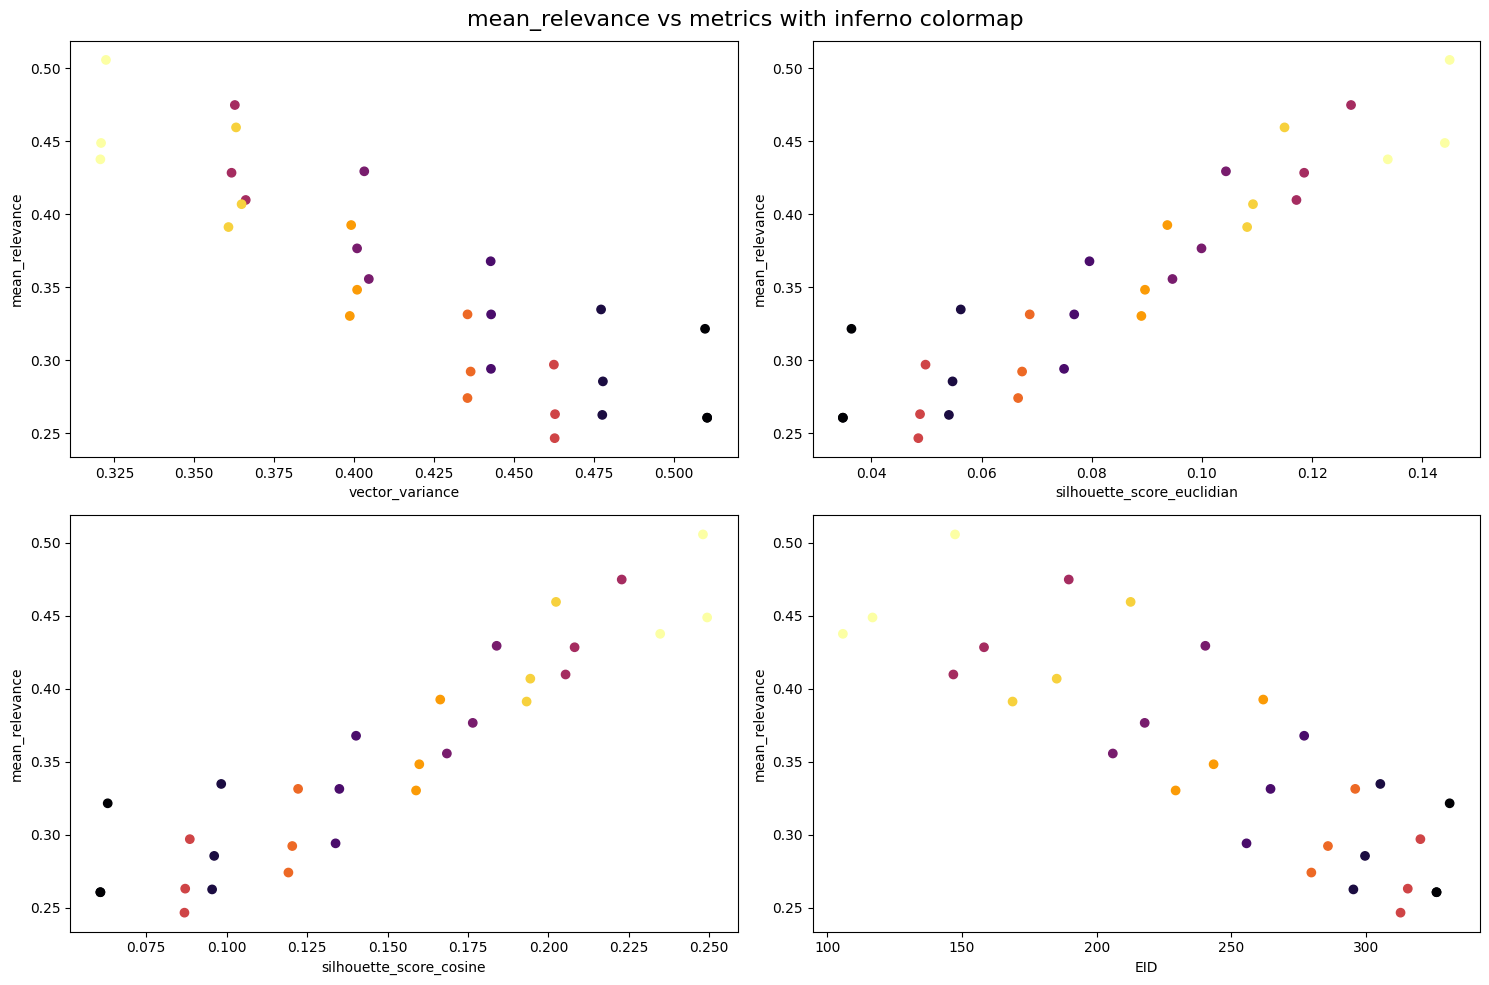

In [6]:
import matplotlib.pyplot as plt

# metrics = ['vector_variance', 'silhouette_score_euclidian', 
#            'silhouette_score_cosine', 'EID', 'redundancy', 'dim']

metrics = ['vector_variance', 'silhouette_score_euclidian', 
           'silhouette_score_cosine', 'EID']

# Создаем сетку графиков 2x3
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correctness vs metrics with inferno colormap', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    scatter = axes[row, col].scatter(t[metric], t['correctness'], c=t['chunk_len'], cmap='inferno')
    axes[row, col].set_xlabel(metric)
    axes[row, col].set_ylabel('correctness')

plt.tight_layout()
plt.show()

# Создаем сетку графиков 2x3
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('mean_relevance vs metrics with inferno colormap', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    scatter = axes[row, col].scatter(t[metric], t['mean_relevance'], c=t['chunk_len'], cmap='inferno')
    axes[row, col].set_xlabel(metric)
    axes[row, col].set_ylabel('mean_relevance')
plt.tight_layout()
plt.show()

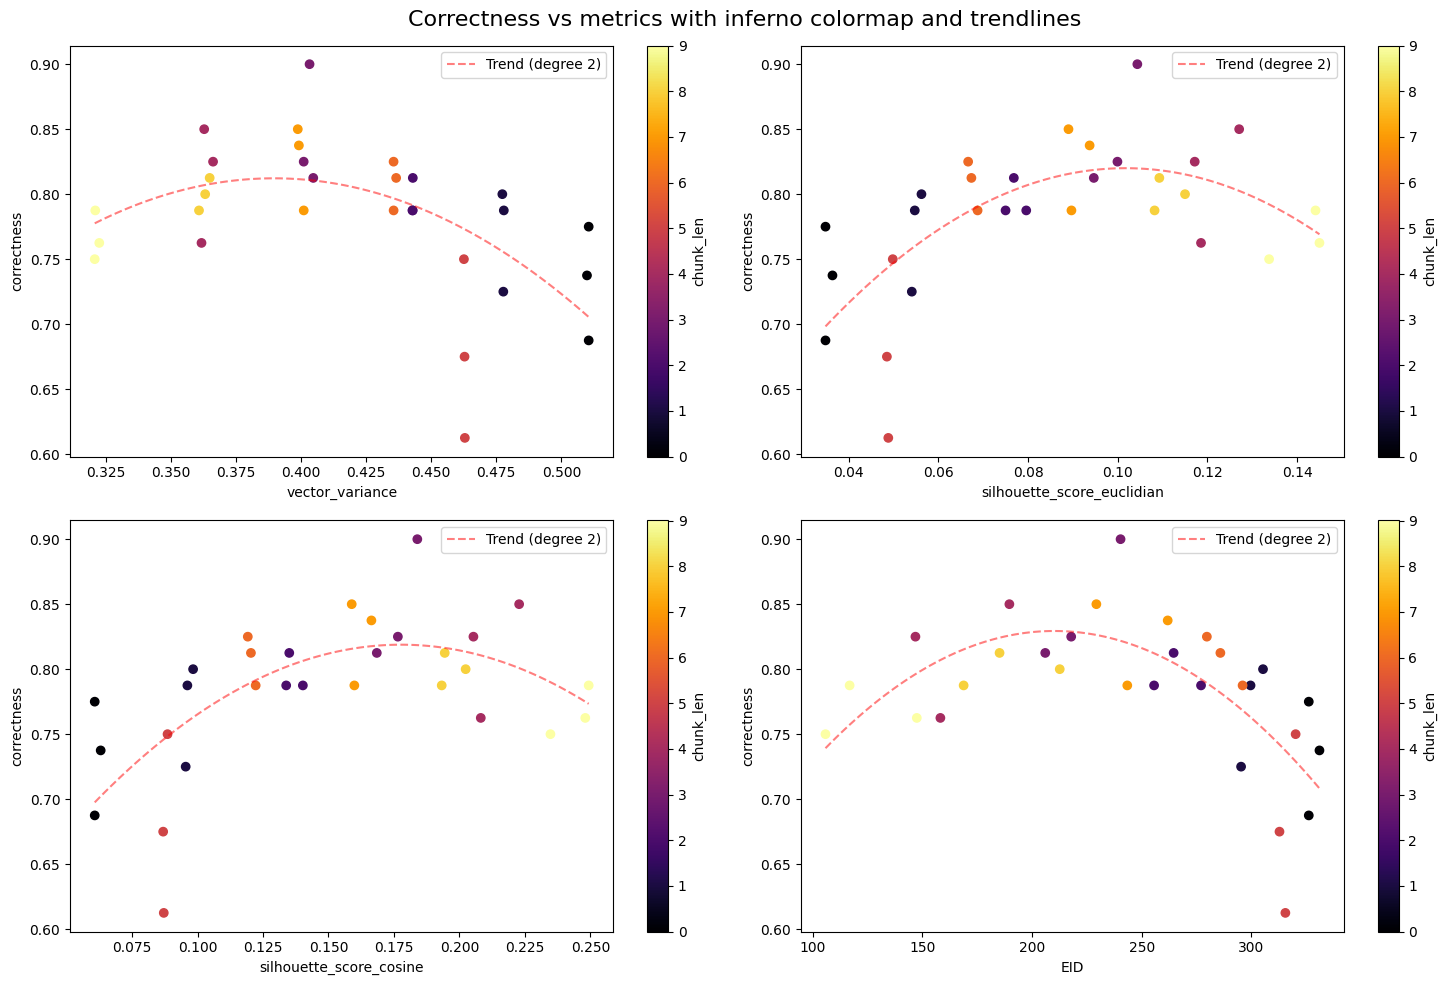

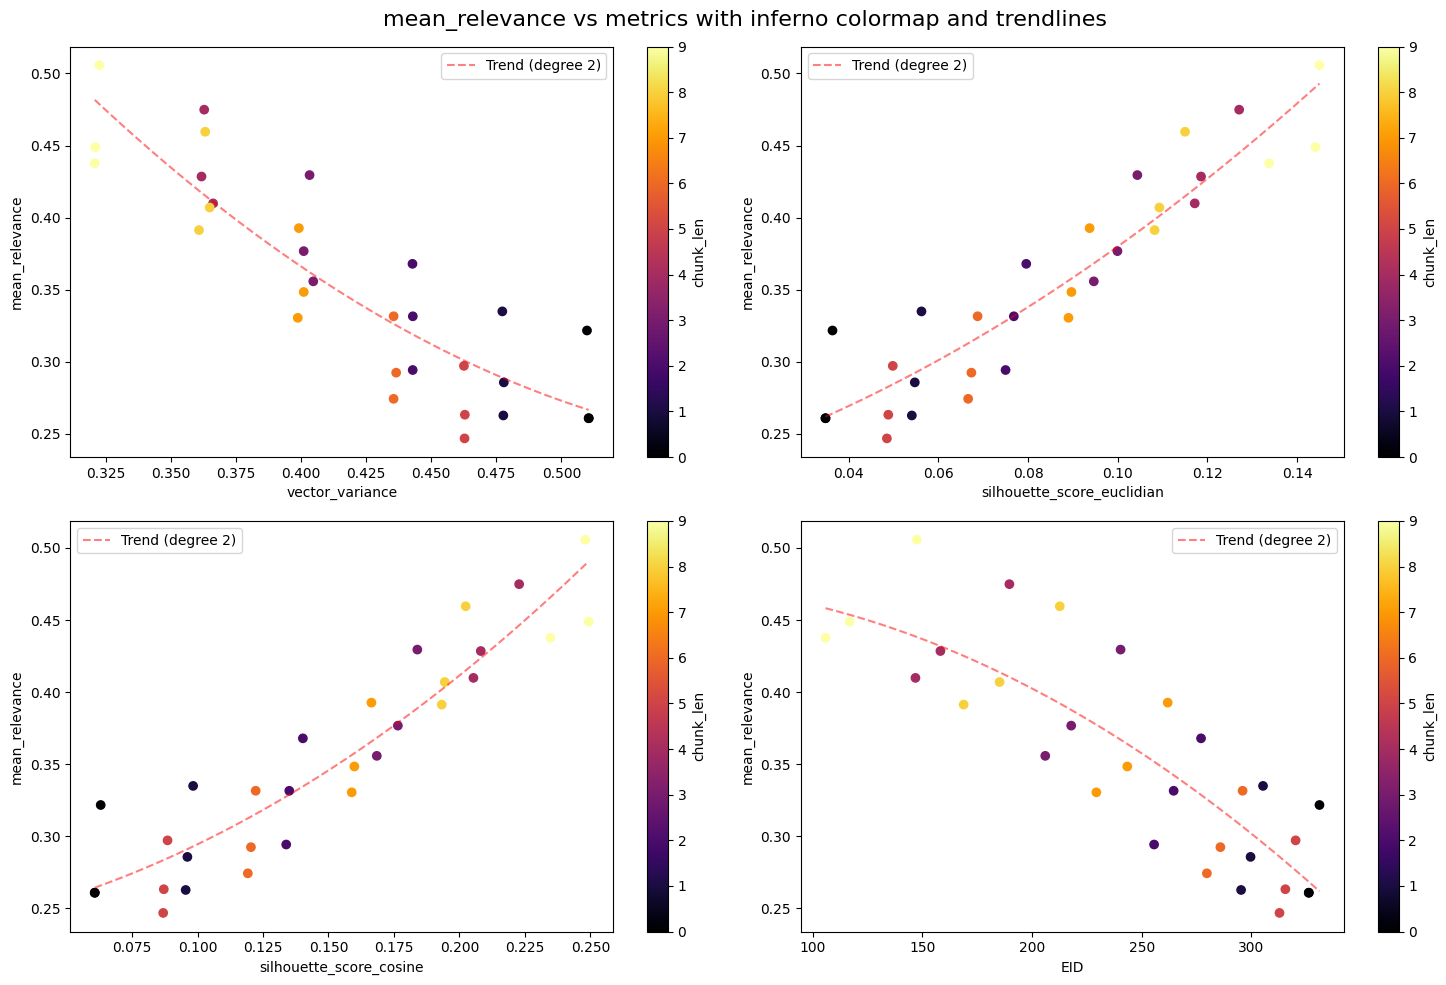

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

metrics = ['vector_variance', 'silhouette_score_euclidian', 
           'silhouette_score_cosine', 'EID']

# Функция для добавления тренда
def add_trendline(ax, x, y, degree=2, color='red', alpha=0.5):
    x_vals = np.array(x).reshape(-1, 1)
    y_vals = np.array(y)
    
    # Удаляем NaN значения
    mask = ~np.isnan(x_vals[:, 0]) & ~np.isnan(y_vals)
    x_vals = x_vals[mask]
    y_vals = y_vals[mask]
    
    if len(x_vals) == 0:
        return
    
    # Полиномиальная регрессия
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_vals, y_vals)
    
    x_fit = np.linspace(min(x_vals), max(x_vals), 100)
    y_fit = model.predict(x_fit)
    
    ax.plot(x_fit, y_fit, color=color, linestyle='--', alpha=alpha, 
            label=f'Trend (degree {degree})')
    ax.legend()

# Графики correctness vs metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Correctness vs metrics with inferno colormap and trendlines', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    scatter = axes[row, col].scatter(t[metric], t['correctness'], c=t['chunk_len'], cmap='inferno')
    add_trendline(axes[row, col], t[metric], t['correctness'])
    axes[row, col].set_xlabel(metric)
    axes[row, col].set_ylabel('correctness')
    fig.colorbar(scatter, ax=axes[row, col], label='chunk_len')

plt.tight_layout()
plt.show()

# Графики mean_relevance vs metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('mean_relevance vs metrics with inferno colormap and trendlines', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    scatter = axes[row, col].scatter(t[metric], t['mean_relevance'], c=t['chunk_len'], cmap='inferno')
    add_trendline(axes[row, col], t[metric], t['mean_relevance'])
    axes[row, col].set_xlabel(metric)
    axes[row, col].set_ylabel('mean_relevance')
    fig.colorbar(scatter, ax=axes[row, col], label='chunk_len')

plt.tight_layout()
plt.show()